

---


**MÁSTER UNIVERSITARIO EN DATA ANALYTICS FOR BUSINESS** | **UPF Barcelona School of Management** | **Curso 2023-2024**

**Trabajo Final de Máster**

**Título del proyecto**: Vía Segura: Análisis de datos para la seguridad vial en Barcelona

**Script**: Análisis de la tipología de los accidentes

**Autores**: Joel Bullich Esquerra y Pablo García Prado

**Mentora**: Alexandra Abós Ortega


---




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import os
import random
from tabulate import tabulate

from google.colab import drive
drive.mount('/content/drive')

pd.set_option('display.max_columns', None)

Mounted at /content/drive


In [2]:
# Ruta del archivo
path = "/content/drive/MyDrive/TFM/clean_data/DatosTipoAccidente.csv"

# Cargar el archivo en un DataFrame
df_tipoaccidente = pd.read_csv(path)

In [3]:
df_tipoaccidente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65271 entries, 0 to 65270
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Numero_expedient           65271 non-null  object 
 1   Codi_districte             65271 non-null  int64  
 2   Nom_districte              65271 non-null  object 
 3   Codi_barri                 65271 non-null  int64  
 4   Nom_barri                  65271 non-null  object 
 5   Codi_carrer                65271 non-null  int64  
 6   Nom_carrer                 65269 non-null  object 
 7   Descripcio_dia_setmana     65271 non-null  object 
 8   Any                        65271 non-null  int64  
 9   Mes_any                    65271 non-null  int64  
 10  Dia_mes                    65271 non-null  int64  
 11  Hora_dia                   65271 non-null  int64  
 12  Descripcio_torn            65271 non-null  object 
 13  Descripcio_tipus_accident  65271 non-null  obj

In [4]:
dias = {'Dl': 'Dilluns', 'Dm': 'Dimarts', 'Dc': 'Dimecres', 'Dj': 'Dijous', 'Dv': 'Divendres', 'Ds': 'Dissabte', 'Dg': 'Diumenge'}
df_tipoaccidente['Descripcio_dia_setmana'] = df_tipoaccidente['Descripcio_dia_setmana'].replace(dias)

## Frecuencia de tipo de Accidentes

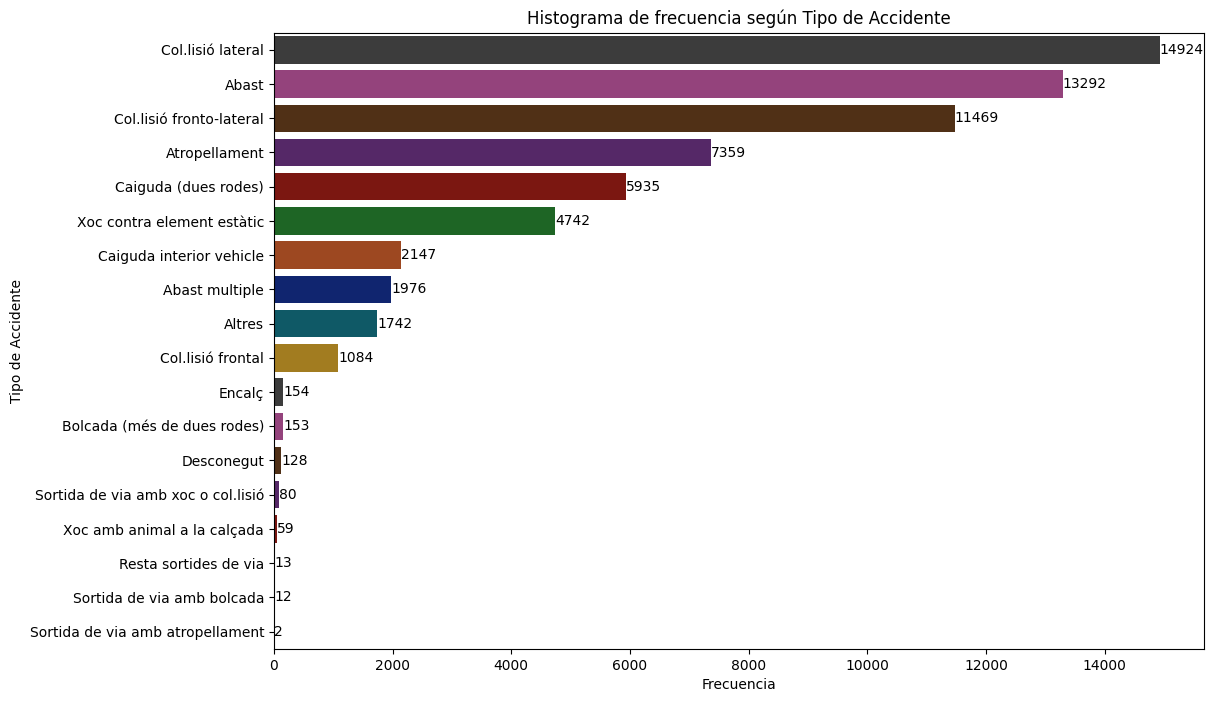

In [5]:
columna = 'Descripcio_tipus_accident'

plt.figure(figsize=(12, 8))
barplot=sns.barplot(y=df_tipoaccidente[columna].value_counts().index, x=df_tipoaccidente[columna].value_counts(), orient='h',hue=df_tipoaccidente[columna].value_counts(), palette='dark', legend=False)
plt.xlabel('Frecuencia')
plt.ylabel('Tipo de Accidente')
plt.title('Histograma de frecuencia según Tipo de Accidente')

for index, value in enumerate(df_tipoaccidente[columna].value_counts()):
    barplot.text(value, index, str(value), ha='left', va='center')

plt.show()

## Tipo de accidentes por Distrito

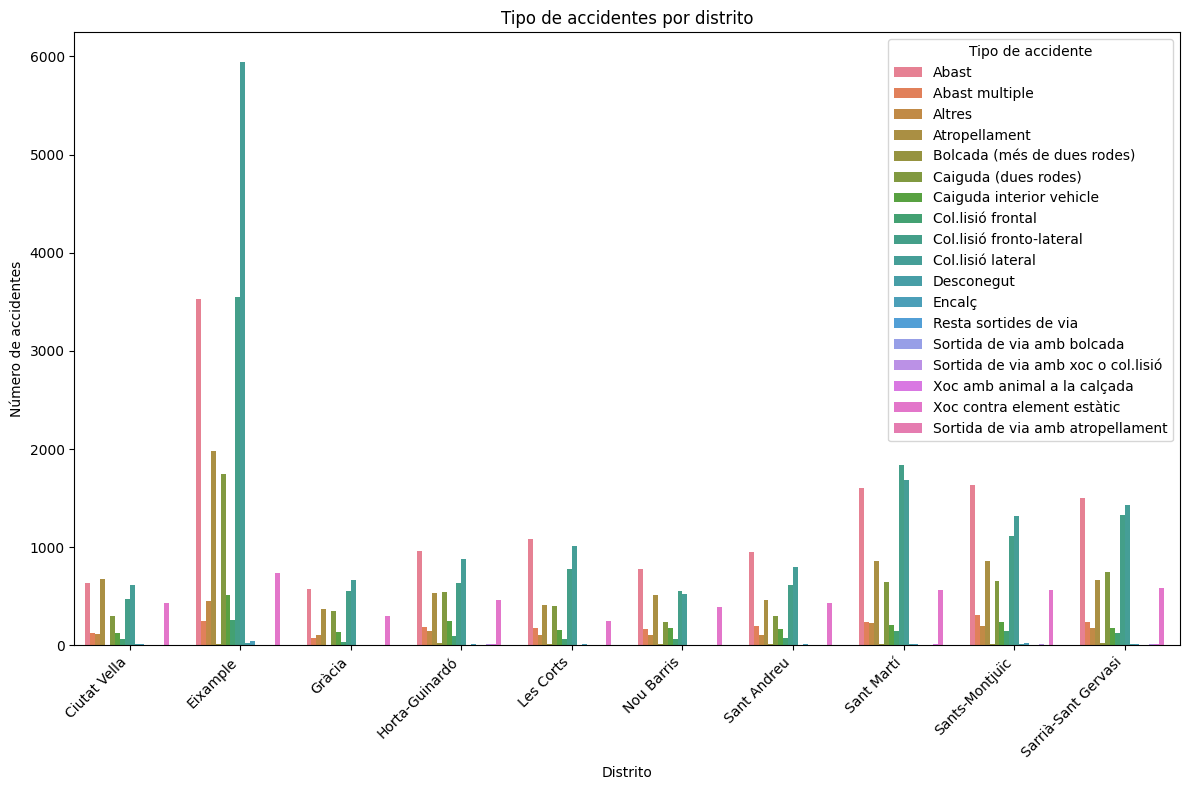

In [6]:
# Elimino aquellas ocurrencias donde el distrito sea 'desconegut'
# Agrupamos segun el tipo de accidente y distrito
#contabilizamos el número de ocurrencias
df_tipoaccidente_filtrado = df_tipoaccidente[df_tipoaccidente['Nom_districte'] != 'Desconegut']
df_tipoaccidente_grouped = df_tipoaccidente_filtrado.groupby(['Nom_districte', 'Descripcio_tipus_accident']).size().reset_index(name='counts')

plt.figure(figsize=(12, 8))
sns.barplot(x='Nom_districte', y='counts', hue='Descripcio_tipus_accident', data=df_tipoaccidente_grouped)
plt.title('Tipo de accidentes por distrito')
plt.xlabel('Distrito')
plt.ylabel('Número de accidentes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de accidente')
plt.tight_layout()
plt.show()

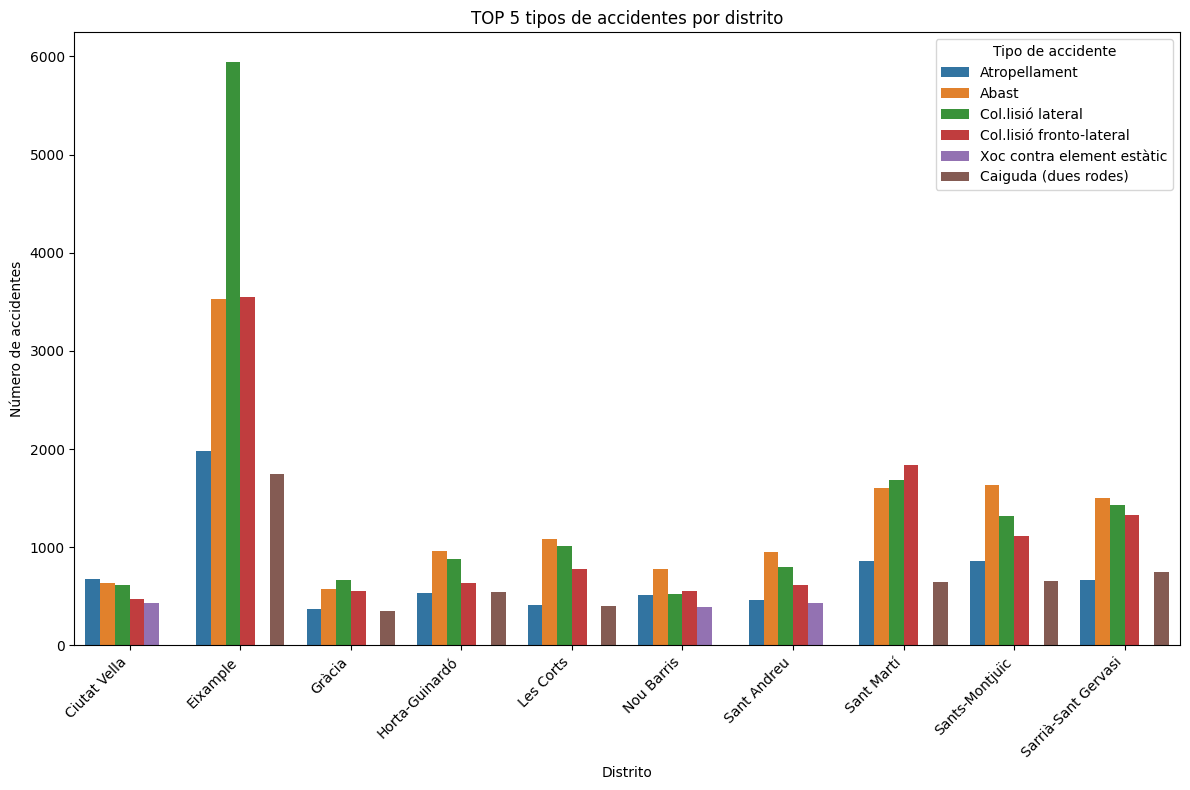

In [7]:

df_tipoaccidente_filtrado = df_tipoaccidente[df_tipoaccidente['Nom_districte'] != 'Desconegut']
# Agrupamos y filtramos por los cinco tipos de accidentes más comunes por distrito
top_5_accidentes_por_distrito = df_tipoaccidente_filtrado.groupby(['Nom_districte', 'Descripcio_tipus_accident']).size().groupby(level=0).nlargest(5).reset_index(level=0, drop=True).reset_index(name='counts')


plt.figure(figsize=(12, 8))
sns.barplot(x='Nom_districte', y='counts', hue='Descripcio_tipus_accident', data=top_5_accidentes_por_distrito)
plt.title('TOP 5 tipos de accidentes por distrito')
plt.xlabel('Distrito')
plt.ylabel('Número de accidentes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de accidente')
plt.tight_layout()
plt.show()

## Tipo de Accidentes según Dia de la Semana

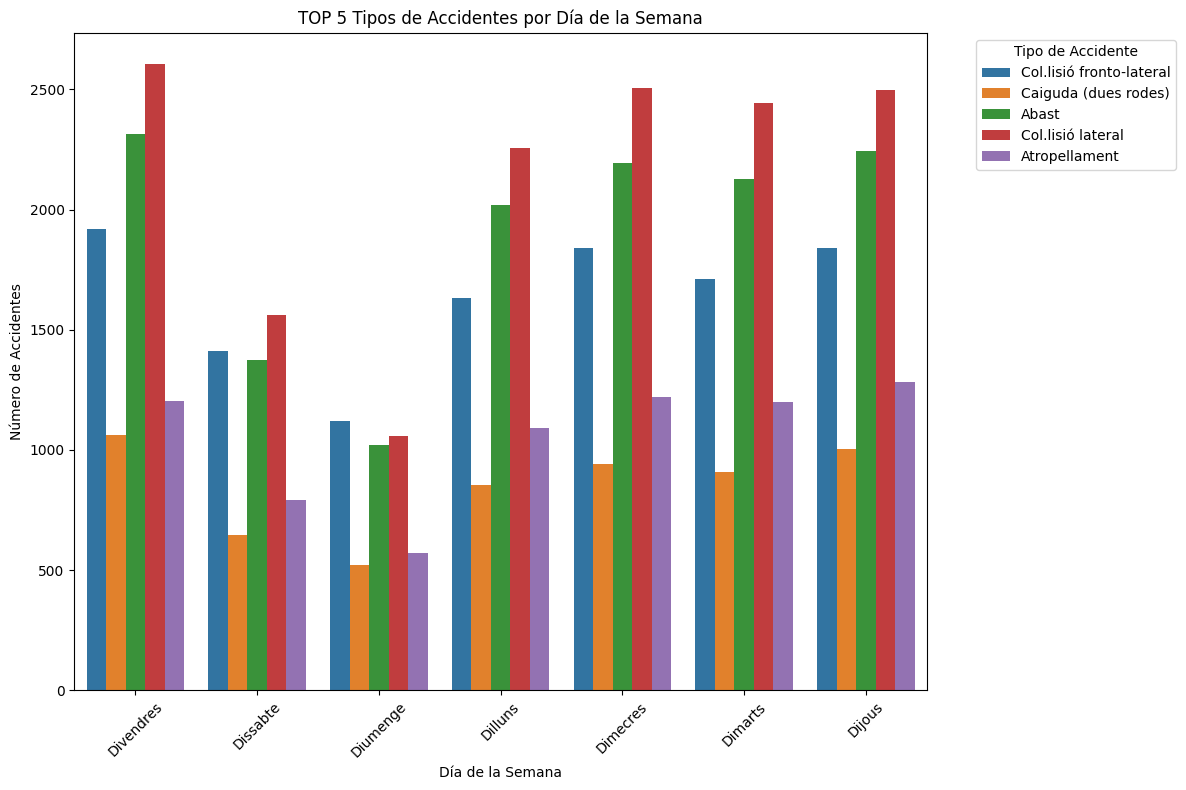

In [8]:
#ahora veremos si el dia de la semana influye en el tipo de accidentes
#TOP 5 grafico de accidentes segun dia de la semana

top_5_accidentes_dia = df_tipoaccidente['Descripcio_tipus_accident'].value_counts().nlargest(5).index
df_top5 = df_tipoaccidente[df_tipoaccidente['Descripcio_tipus_accident'].isin(top_5_accidentes_dia)]

plt.figure(figsize=(12, 8))
sns.countplot(x='Descripcio_dia_setmana', hue='Descripcio_tipus_accident', data=df_top5)
plt.title('TOP 5 Tipos de Accidentes por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Accidentes')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Accidente', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

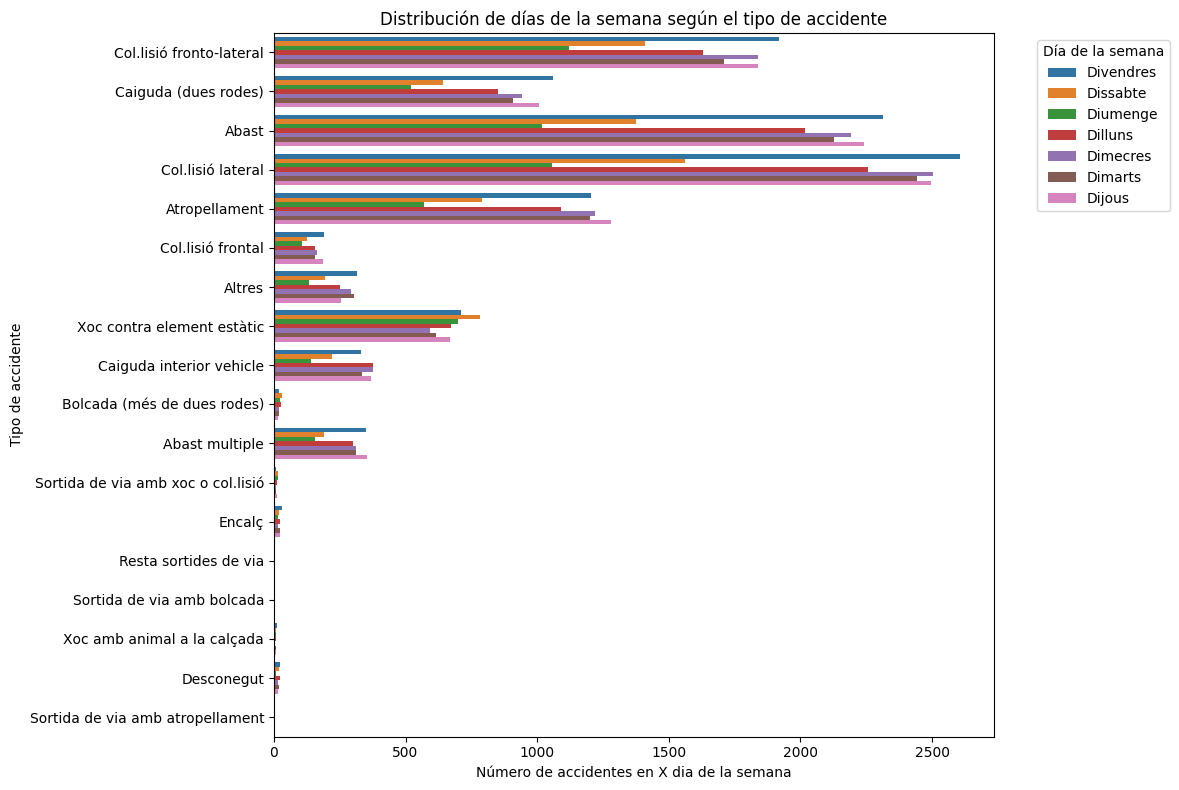

In [9]:
# gráfico de distribución de días de la semana según el tipo de accidente
plt.figure(figsize=(12, 8))
sns.countplot(y='Descripcio_tipus_accident', hue='Descripcio_dia_setmana', data=df_tipoaccidente)
plt.title('Distribución de días de la semana según el tipo de accidente')
plt.xlabel('Número de accidentes en X dia de la semana')
plt.ylabel('Tipo de accidente')
plt.legend(title='Día de la semana', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

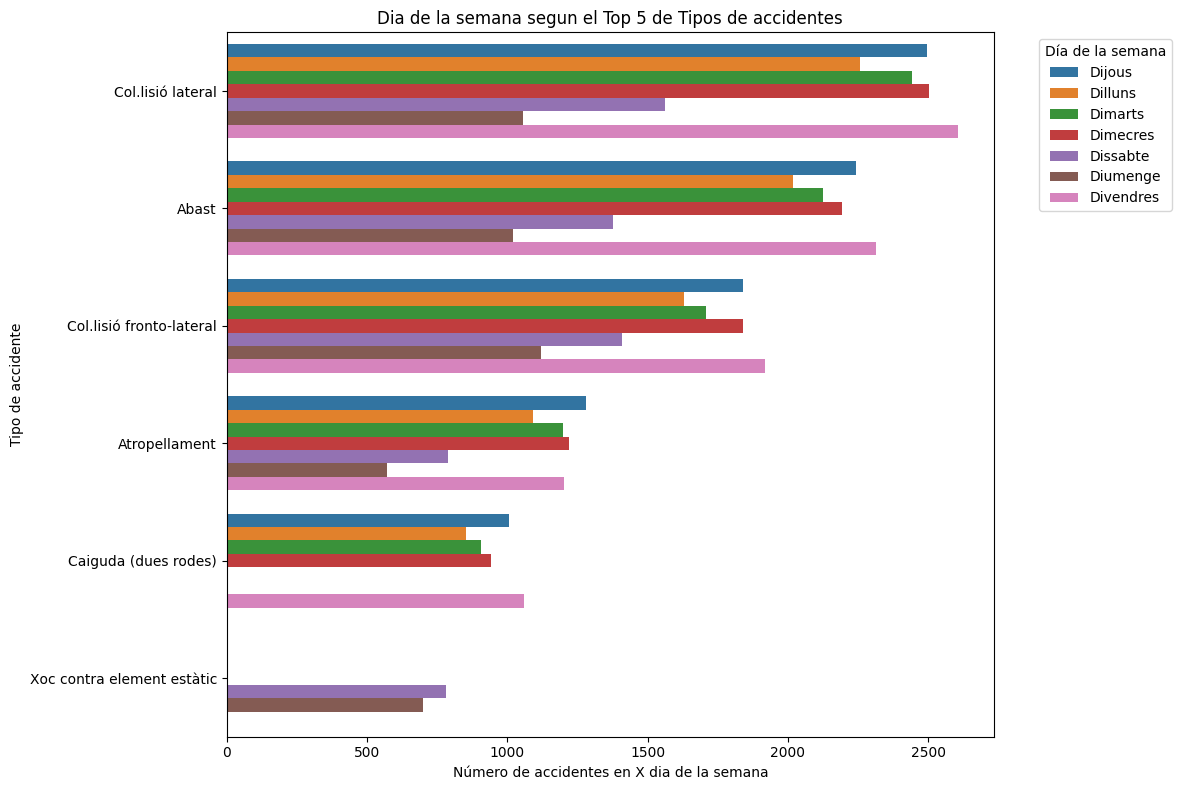

In [10]:
# En este caso, agrupamos por "Descripcio_dia_setmana" y "Descripcio_tipus_accident" y contamos el número de ocurrencias
top5_accidents_por_dia = df_tipoaccidente.groupby(['Descripcio_dia_setmana', 'Descripcio_tipus_accident']).size().reset_index(name='counts')

# Para cada día de la semana, seleccionaremos los 5 tipos de accidentes más comunes
top5_accidents_por_dia = top5_accidents_por_dia.groupby('Descripcio_dia_setmana').apply(lambda x: x.nlargest(5, 'counts')).reset_index(drop=True)

plt.figure(figsize=(12, 8))
sns.barplot(x='counts', y='Descripcio_tipus_accident', hue='Descripcio_dia_setmana', data=top5_accidents_por_dia)
plt.title('Dia de la semana segun el Top 5 de Tipos de accidentes')
plt.xlabel('Número de accidentes en X dia de la semana')
plt.ylabel('Tipo de accidente')
plt.legend(title='Día de la semana', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Accidentes segun Año, Mes, Dia y Turno

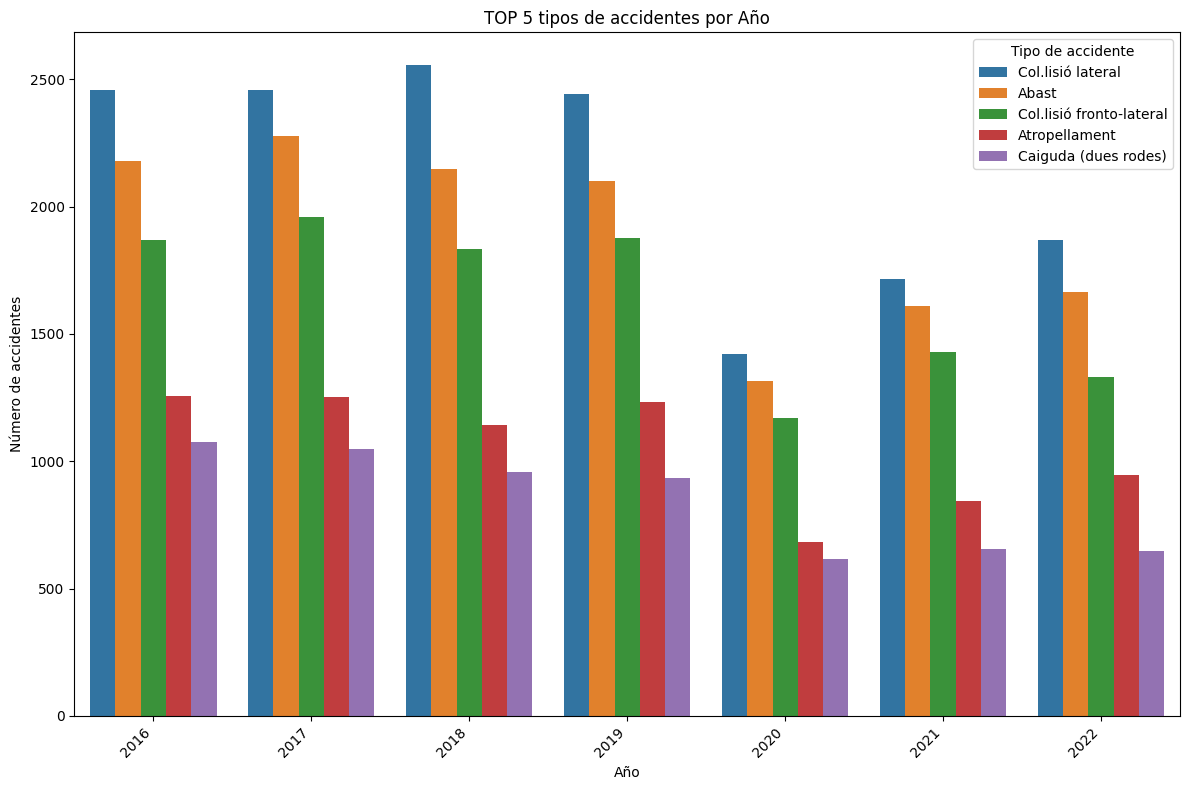

In [11]:
#empezamos viendo, por años, qué TOP 5 tipos de accidentes han sido los más frecuentes
top_5_accidents_per_any = df_tipoaccidente.groupby(['Any', 'Descripcio_tipus_accident']).size().groupby(level=0).nlargest(5).reset_index(level=0, drop=True).reset_index(name='counts')

plt.figure(figsize=(12, 8))
sns.barplot(x='Any', y='counts', hue='Descripcio_tipus_accident', data=top_5_accidents_per_any)
plt.title('TOP 5 tipos de accidentes por Año')
plt.xlabel('Año')
plt.ylabel('Número de accidentes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de accidente')
plt.tight_layout()
plt.show()

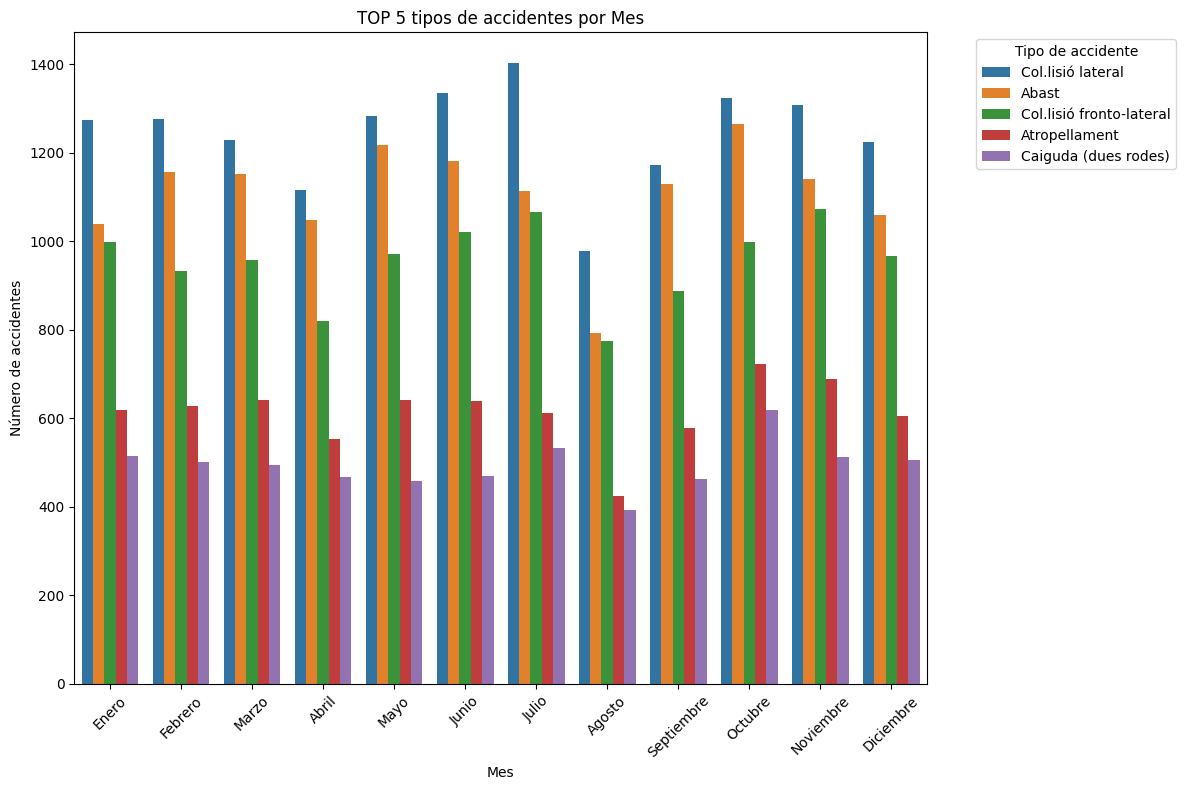

In [12]:
#top 5 accidentes segun mes del año

# Ponemos los meses en un diccionario como valor de texto categorico
meses = {
    1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio',
    7: 'Julio', 8: 'Agosto', 9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
}

# Copiamos temporalalmente el Df para poder convertir el Mes_any
top_5_accidents_per_mes = df_tipoaccidente.groupby(['Mes_any', 'Descripcio_tipus_accident']).size().groupby(level=0).nlargest(5).reset_index(level=0, drop=True).reset_index(name='counts')
top_5_accidents_per_mes_temp = top_5_accidents_per_mes.copy()
top_5_accidents_per_mes_temp['Mes_any'] = top_5_accidents_per_mes_temp['Mes_any'].map(meses)


plt.figure(figsize=(12, 8))
sns.barplot(x='Mes_any', y='counts', hue='Descripcio_tipus_accident', data=top_5_accidents_per_mes_temp)
plt.title('TOP 5 tipos de accidentes por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de accidentes')
plt.xticks(rotation=45)
plt.legend(title='Tipo de accidente', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

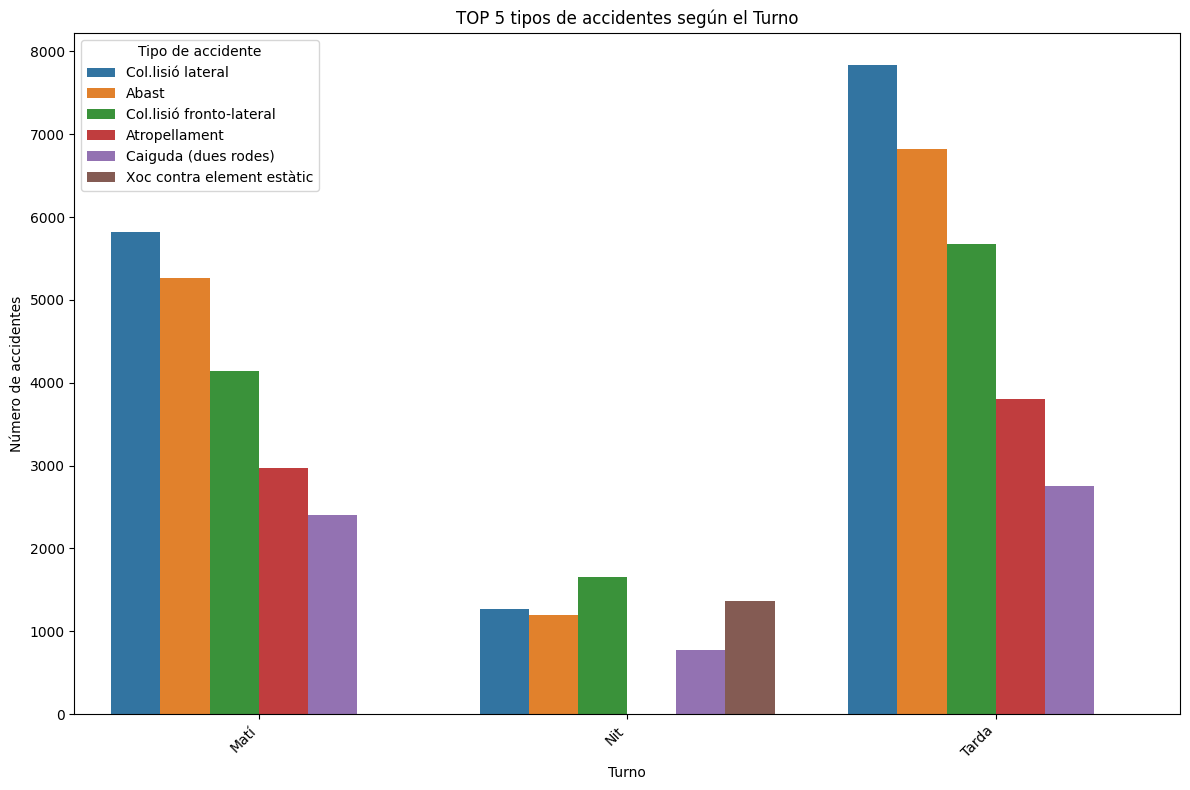

In [13]:
#ahora pasamos a ver el Top 5 de accidentes segun el turno en el que se producen

df_tipoaccidente_top5_turno = df_tipoaccidente.groupby(['Descripcio_torn','Descripcio_tipus_accident']).size().groupby(level=0).nlargest(5).reset_index(level=0, drop=True).reset_index(name='counts')

plt.figure(figsize=(12, 8))
sns.barplot(x='Descripcio_torn', y='counts', hue='Descripcio_tipus_accident', data=df_tipoaccidente_top5_turno)
plt.title('TOP 5 tipos de accidentes según el Turno')
plt.xlabel('Turno')
plt.ylabel('Número de accidentes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de accidente')
plt.tight_layout()
plt.show()